In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED=False

In [2]:
import os
import sys
sys.path.append("../")
import folderparser as fp
import folderscraper as fs
import interfacemetrics as intm
from interfacePlots import *
from config import cfg
LOGGERDEFINED = fp.openLog('interfacemetrics_viscsweep.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=True)

In [3]:
EFOLDERS = [os.path.join(cfg.path.server, 'viscositysweep', s) for s in ['HBnewtsweep', 'newtHBsweep', 'newtnewtsweep', 'HBHBsweep', 'NewtFine']]
EXPORTFOLDER = os.path.join(cfg.path.fig, 'viscositysweep', 'plots')

# Generating files

In [3]:
import pandas as pd
o = []
for topfolder in [r'\\cfs2e.nist.gov\642\NIST_Projects\Additive Manufacturing and Rheology\OpenFOAM\simulations\viscositysweep\archive\mesh refinement']:
    for f in fp.caseFolders(topfolder):
        fs.populate(f)
        l = fp.legendUnique(f)
        if len(l)>0:
            o.append(l)
p = pd.DataFrame(o)
p.to_csv(r'\\cfs2e.nist.gov\642\NIST_Projects\Additive Manufacturing and Rheology\OpenFOAM\simulations\viscositysweep\archive\mesh refinement\legend_mesh.csv')

In [5]:
import pandas as pd
o = []
for topfolder in [os.path.join(cfg.path.server, 'viscositysweep', 'NewtFine')]:
    for f in os.listdir(topfolder):
        l = fp.legendUnique(os.path.join(topfolder, f))
        if len(l)>0:
            o.append(l)
p = pd.DataFrame(o)
p.to_csv(os.path.join(cfg.path.fig, 'viscositysweep', 'legend_newtfine.csv'))

In [ ]:
import pandas as pd
o = []
for topfolder in EFOLDERS:
    for f in os.listdir(topfolder):
        l = fp.legendUnique(os.path.join(topfolder, f))
        if len(l)>0:
            o.append(l)
p = pd.DataFrame(o)
p.to_csv(os.path.join(cfg.fig, 'viscositysweep', 'legend_general.csv'))

In [19]:
for topfolder in [os.path.join(cfg.path.server, 'viscositysweep', 'NewtFine')]:
    for folder in fp.caseFolders(topfolder):
        intm.sumAndSteady(folder, False)

DEBUG: //cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\viscositysweep\NewtFine\nb700
INFO:     Exported //cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\viscositysweep\NewtFine\nb700\sliceSummaries.csv
INFO:     Exported //cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\viscositysweep\NewtFine\nb700\steadyTimes.csv
INFO:     Exported //cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\viscositysweep\NewtFine\nb700\steadyPositions.csv
DEBUG: //cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\viscositysweep\NewtFine\nb701
INFO:     Exported //cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\viscositysweep\NewtFine\nb701\sliceSummaries.csv
INFO:     Exported //cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simul

In [49]:
tt,u = linePressures(os.path.join(cfg.path.server, 'viscositysweep', 'newtnewtsweep'), os.path.join(cfg.path.fig, 'viscositysweep'), 'pressures.csv')

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\viscositysweep\pressures.csv


In [ ]:
for topfolder in EFOLDERS:
    for f in os.listdir(topfolder):
        if os.path.exists(os.path.join(topfolder, f, 'line_t_10_z_0.5.csv'))

In [16]:
tt0,u0 = summaryTable(EFOLDERS, 2.5, 5, os.path.join(cfg.path.fig, 'viscositysweep'))

INFO: //cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\viscositysweep\HBnewtsweep
INFO: //cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\viscositysweep\newtHBsweep
INFO: //cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\viscositysweep\newtnewtsweep
INFO: //cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\viscositysweep\HBHBsweep
INFO: //cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\viscositysweep\NewtFine
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\viscositysweep\summaryTable_x_5_t_2.5.csv


In [21]:
# plot_metrics
tt0,u0 = summaryTable([os.path.join(cfg.path.server, 'conicalNozzle')], 2.5, 5, os.path.join(cfg.path.fig, 'conicalNozzle'))

INFO: //cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\conicalNozzle
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\summaryTable_x_5_t_2.5.csv


In [23]:
tt0.keys()

Index(['folder', 'ink', 'nuink', 'tau0ink', 'kink', 'nink', 'rhoink', 'sup',
       'nusup', 'tau0sup', 'ksup', 'nsup', 'rhosup', 'sigma', 'nozzleAngle',
       'vink', 'vsup', 'dsup', 'dink', 'gdot_ink', 'visc0_ink', 'CaInv_ink',
       'Re_ink', 'gdot_sup', 'visc0_sup', 'CaInv_sup', 'Re_sup', 'viscRatio',
       'ReRatio', 'x', 'xbehind', 'time', 'centery', 'centerz', 'area',
       'maxheight', 'maxwidth', 'centeryn', 'centerzn', 'arean', 'maxheightn',
       'maxwidthn', 'vertdisp', 'vertdispn', 'aspectratio', 'speed',
       'speeddecay'],
      dtype='object')

# Plots

In [ ]:
fullv = [10**i for i in range(-2, 6)]
for TOPFOLDER in EFOLDERS:
        xposition = 5
        for t in [2.5]:
            for s in [['arean', 1.0, 1.8]]:
                metricPlots(TOPFOLDER, EXPORTFOLDER, t, xposition, s[0], xvar='nuink', yvar='nusup', split=True, sigmalist=[0,40], overwrite=True, nuinklist=fullv, nusuplist=fullv, adjustBounds=False, tmin=s[1], tmax=s[2])

In [ ]:
fullv = [10**i for i in range(-2, 6)]
for TOPFOLDER in EFOLDERS:
        for sigma in [0, 40]:
            imsize=1
            steadyPlots(TOPFOLDER, imsize, EXPORTFOLDER, [sigma], xvar='nuink', yvar='nusup', overwrite=True, nuinklist=fullv, nusuplist=fullv, adjustBounds=False)

In [18]:
for s in ['newtnewtsweep', 'controls']:
    TOPFOLDER = os.path.join(cfg.path.server, 'viscositysweep', s)
    xvar = 'nuink'
    yvar = 'nusup'
    fullv = [10**i for i in range(1, 6)]
    t = 2.5
    sigma = 0
    suplist = [10**3]
    for ta in ['y_py', 'x_uslicex', 'y_umag', 'y_uzslicey']:
        picPlots0(TOPFOLDER, EXPORTFOLDER, t, sigma, tag=ta, xvar=xvar, yvar=yvar, overwrite=False, nuinklist=fullv, nusuplist=suplist, adjustBounds=False)

Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\viscositysweep\plots\controls\pics_y_py_t2.5_sigma_0_controls_xvar_nuink_yvar_nusup
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\viscositysweep\plots\controls\pics_y_umag_t2.5_sigma_0_controls_xvar_nuink_yvar_nusup


In [20]:
for s in ['newtnewtsweep']:
    TOPFOLDER = os.path.join(cfg.path.server, 'viscositysweep', s)
    xvar = 'nuink/nusup'
    yvar = '1/nusup'
    t = 1
    sigma = 0
    for ta in ['y_umag']:
        picPlots0(TOPFOLDER, EXPORTFOLDER, t, sigma, tag=ta, xvar=xvar, yvar=yvar, overwrite=True, adjustBounds=True)

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\viscositysweep\plots\newtnewtsweep\pics_y_umag_t1_sigma_0_newtnewtsweep_xvar_nuinkdivnusup_yvar_1divnusup


Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\viscositysweep\plots\HBnewtsweep\xs_5_t_2.5_HBnewtsweep_xvar_nuink_yvar_nusup
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\viscositysweep\plots\HBnewtsweep\steady_0_HBnewtsweep_xvar_nuink_yvar_nusup
Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\viscositysweep\plots\HBnewtsweep\steady_40_HBnewtsweep_xvar_nuink_yvar_nusup


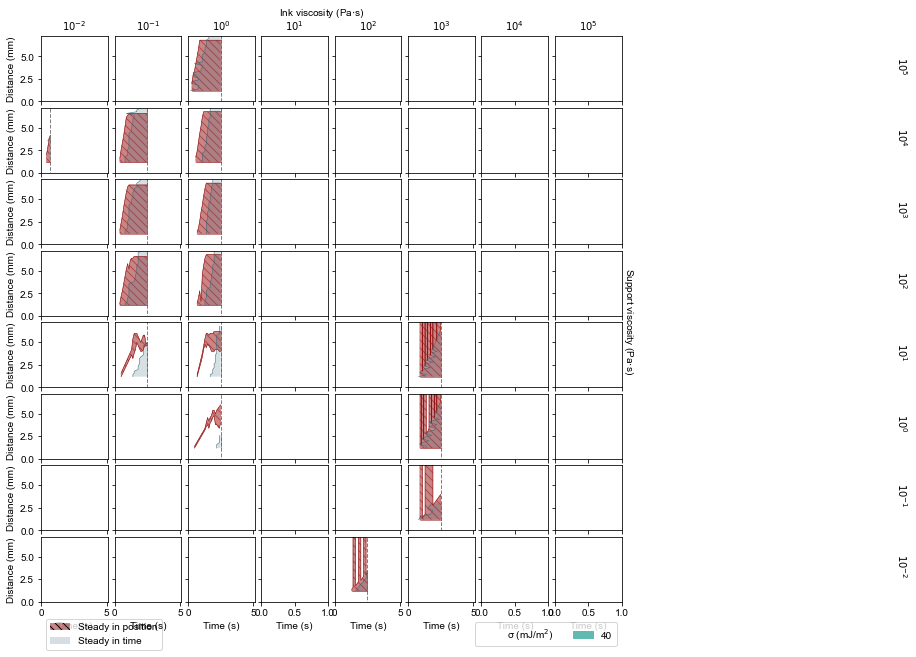

In [40]:
fullv = [10**i for i in range(-2, 6)]

xvar = 'nuink'
yvar = 'nusup'

for TOPFOLDER in [EFOLDERS[0]]:
    txtPlots0(TOPFOLDER, EXPORTFOLDER, xvar=xvar, yvar=yvar, overwrite=False)
    timePlots(TOPFOLDER, EXPORTFOLDER, xvar=xvar, yvar=yvar, overwrite=False)
    runtimePlots0(TOPFOLDER, EXPORTFOLDER, xvar=xvar, yvar=yvar, overwrite=False)
    
    xposition = 5
    for t in [2.5]:
        for s in [['arean', 0.7, 1.8], ['vertdispn', 0, 1], ['aspectratio', 0.6, 1.7], ['speeddecay', 0.5, 1.0]]:
            metricPlots(TOPFOLDER, EXPORTFOLDER, t, xposition, s[0], xvar=xvar, yvar=yvar, split=True,\
                        sigmalist=[0,40], overwrite=False, nuinklist=fullv, nusuplist=fullv, \
                        adjustBounds=False, tmin=s[1], tmax=s[2])
    for t in [0.5, 1, 2.5]:
        for sigma in [0, 40]:
            for ta in ['y_umag', 'y_viscy', 'y_uslicey', 'x_uslicex', 'x_viscx']:
                picPlots0(TOPFOLDER, EXPORTFOLDER, t, sigma, tag=ta, xvar=xvar, yvar=yvar, overwrite=False,\
                          nuinklist=fullv, nusuplist=fullv, adjustBounds=False)
    for t in [2.5]:
        XSPlots0(TOPFOLDER, EXPORTFOLDER, t, xposition, [0, 40], xvar=xvar, yvar=yvar, overwrite=False,\
                 nuinklist=fullv, nusuplist=fullv, adjustBounds=False)
    for sigma in [0, 40]:
        imsize=1.3
        steadyPlots(TOPFOLDER, imsize, EXPORTFOLDER, [sigma], xvar=xvar, yvar=yvar, overwrite=False, \
                    nuinklist=fullv, nusuplist=fullv, adjustBounds=False)

In [20]:
fullv = [10**i for i in range(-2, 6)]

xvar = 'nuink'
yvar = 'nusup'

for TOPFOLDER in EFOLDERS:
    for t in range(0,26):
        t = round(t/10, 1)
        for sigma in [0, 40]:
            for ta in ['y_umag']:
                picPlots0(TOPFOLDER, EXPORTFOLDER, t, sigma, tag=ta, xvar=xvar, yvar=yvar, overwrite=False, nuinklist=fullv, nusuplist=fullv, adjustBounds=False, svg=False)

In [ ]:
for mode in [0,1]:
    flist = []
    for f in [533, 37, 45, 53]:
        flist.append(os.path.join(EFOLDERS[2], 'nb'+str(f)))
    fig = linePlots(flist, intmp.divfunc, 1, 2.25, mode)
    fig.savefig(os.path.join(EXPORTFOLDER, r'newtnewt_velz_t_1_x_1.5_div_sup100_sig_0_'+str(mode)+'.svg'))

In [ ]:
for mode in [0,1]:
    flist = []
    for f in [247, 241, 253]:
        flist.append(os.path.join(EFOLDERS[0], 'nb'+str(f)))
    fig = linePlots(flist, intmp.inkfunc, 1, 2.25, mode)
    fig.savefig(os.path.join(EXPORTFOLDER, 'HBnewt_velz_t_1_x_1.5_inkv_sup100_sig_0_'+str(mode)+'.svg'))

In [ ]:
for mode in [0,1]:
    flist = []
    for f in [221, 227, 709]:
        flist.append(os.path.join(EFOLDERS[1], 'nb'+str(f)))
    fig = linePlots(flist, intmp.supfunc, 1, 2.25, mode)
    fig.savefig(os.path.join(EXPORTFOLDER, 'newtHB_velz_t_1_x_1.5_supv_ink10_sig_0_'+str(mode)+'.svg'))

In [ ]:
flist = []
#for f in [32, 42, 52, 62]:
for f in [40,50,60]:
    flist.append(os.path.join(TOPFOLDER, 'nb'+str(f)))
fig = lineplots(flist, intmp.supfunc, 5, 2.25)
fig.savefig(os.path.join(EXPORTFOLDER, 'velz_t_5_sup_div0.1_sig_40.svg'))


In [ ]:
flist = []
for f in [22, 40, 41]:
    flist.append(os.path.join(TOPFOLDER, 'nb'+str(f)))
fig = linePlots(flist, intmp.sigfunc, 5, 2.25)
fig.saveFig(os.path.join(EXPORTFOLDER, 'velz_t_5_sig_div0.1_sup_1.svg'))

In [ ]:
# flist = []
# for f in [50, 42, 62]:
#     flist.append(os.path.join(TOPFOLDER, 'nb'+str(f)))
flist = [os.path.join(EFOLDERS[2], 'nb37'), os.path.join(EFOLDERS[0], 'nb247')]
for f in flist:
    stabilityPlot(f, EXPORTFOLDER, 2.5, 3, export=True)

In [ ]:
stabilityPlot(os.path.join(EFOLDERS[2], 'nb37'), EXPORTFOLDER, 2.5, 3, export=True)

In [ ]:
t = 0
for d in EFOLDERS:
    for f in os.listdir(d):
        l = intm.importLegend(os.path.join(d, f))
        if not type(l) is int:
            t1 = float(l.loc[5, 'val'])
            if t1>0:
                t+=t1
t

In [ ]:
import pandas as pd
metrics = []
for TOPFOLDER in EFOLDERS:
    for f in os.listdir(TOPFOLDER):
        try:
            m = metricVals(os.path.join(TOPFOLDER, f), 2.5, 5, ['arean', 'vertdispn', 'aspectratio', 'speeddecay'])
        except:
            pass
        else:
            metrics.append(m)
df = pd.DataFrame(metrics)
df

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=3,sharex='col', sharey='row',figsize=(6.5,6.5))
cmap = plt.get_cmap('tab20c')

for t in range(len(EFOLDERS)):
    TOPFOLDER = EFOLDERS[t]
    metrics = []
    for f in os.listdir(TOPFOLDER):
        try:
            m = metricVals(os.path.join(TOPFOLDER, f), 2.5, 5, ['arean', 'vertdispn', 'aspectratio', 'speeddecay'])
        except:
            pass
        else:
            metrics.append(m)
    df = pd.DataFrame(metrics)

    df2 = df[df['arean']<3]
    df2 = df2[df2['vertdispn']>-0.1]
    df2 = df2[df2['vertdispn']<1.2]
    df2 = df2[df2['speeddecay']<1.1]

    slist = df.keys()
    for i in range(4):
        for j in range(i):
            color = cmap(t/3)
            if j==0 and i==1:
                axs[j,i-1].scatter(df2[slist[i]], df2[slist[j]], s=5, color=color, label=os.path.basename(TOPFOLDER))
            else:
                axs[j,i-1].scatter(df2[slist[i]], df2[slist[j]], s=5, color=color)
            axs[j,i-1].set_xlabel(slist[i])
            axs[j,i-1].set_ylabel(slist[j])
axs[0,0].legend()


In [ ]:
intm.exportIm(os.path.join(EXPORTFOLDER, 'correlations'), fig)

In [11]:
import matplotlib.pyplot as plt

In [50]:
d = pd.read_csv(os.path.join(cfg.path.fig, 'viscositysweep', 'pressures.csv'),index_col=0, skiprows=[1])
u = pd.read_csv(os.path.join(cfg.path.fig, 'viscositysweep', 'pressures.csv'), nrows=1)

In [31]:
d[d.dP<0].nusup.unique()

array([  0.1,   1. ,  10. , 100. ])

In [52]:
u

,Unnamed: 0,folder,ink,nuink,tau0ink,kink,nink,sup,nusup,tau0sup,ksup,nsup,sigma,nozzleAngle,pU,pD,dP
0,NaN,NaN,NaN,Pa*s,Pa,Pa*s^n,NaN,NaN,Pa*s,Pa,Pa*s^n,NaN,mJ/m^2,degree,kg/(m*s^2),kg/(m*s^2),kg/(m*s^2)


In [46]:
d.sup_Re.min(), d.sup_Re.max()

(9.070000000000001e-11, 0.0009070000000000001)

In [55]:
[np.log10(s) for s in supre],[np.log10(s) for s in p]

C:\Users\lmf1\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


([-0.04239271293990473,
  -1.0423927129399049,
  -2.042392712939905,
  -3.042392712939905,
  -4.042392712939905,
  -5.042392712939905,
  -6.042392712939905,
  -7.042392712939905],
 [-0.15600101686143214,
  nan,
  1.2292915185070965,
  2.6477782990035865,
  3.616876434127255,
  4.739184726680157,
  5.724436193744097,
  6.704092363833621])

In [64]:
cfg.path.fig

'C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries'

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\viscositysweep\plots\newtnewtsweep\pressure


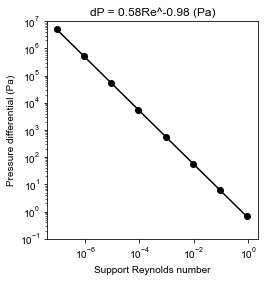

In [65]:
d.sort_values(by='nusup', inplace=True)
d['sup_Re'] = (1000*0.01*0.000907)/d['nusup']
fig,ax = plt.subplots(1,1)
d3 = d[d.dP>0]
supre = d3.sup_Re.unique()
p = [d3[d3.sup_Re==s].dP.mean() for s in supre]
err = [d3[d3.sup_Re==s].dP.sem() for s in supre]
coeffs = np.polyfit([np.log10(x) for x in supre], [np.log10(x) for x in p], 1)
x = [10**i for i in range(-7,1)]
ax.plot(x, [10**coeffs[1]*xi**coeffs[0] for xi in x], color='black')
ax.errorbar(supre, p, yerr=err, color='black', linestyle='None', fmt='o')
# ax.scatter(supre, p, color='black', linestyle='None')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(10**-1, 10**7)
ax.set_xlabel('Support Reynolds number')
ax.set_ylabel('Pressure differential (Pa)')
ax.set_aspect('equal', adjustable='box')
ax.set_title('dP = {:0.2f}Re^{:0.2f} (Pa)'.format(10**coeffs[1], coeffs[0]))
intm.exportIm(os.path.join(cfg.path.fig, 'viscositysweep', 'plots', 'newtnewtsweep', 'pressure'), fig)

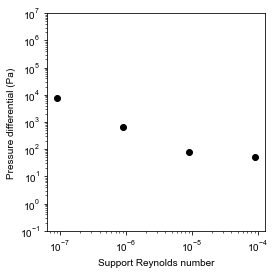

In [45]:
d['sup_Re'] = (0.01*0.000907)/d['nusup']
fig,ax = plt.subplots(1,1)
d2 = d[d.dP<0]
supre = d2.sup_Re.unique()
p = [-d2[d2.sup_Re==s].dP.mean() for s in supre]
err = [d2[d2.sup_Re==s].dP.sem() for s in supre]
ax.errorbar(supre, p, yerr=err, color='black', linestyle='None', fmt='o')
# ax.scatter(supre, p, color='black', linestyle='None')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(10**-1, 10**7)
ax.set_xlabel('Support Reynolds number')
ax.set_ylabel('Pressure differential (Pa)')
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

In [39]:
err

[0.08779592770228319,
 7.285573661082793,
 14.643206172226792,
 90.4655892390681,
 968.4591211512231,
 3309.164486833422,
 45240.6576410392,
 413662.10436154465]

In [40]:
supre

array([9.07e-04, 9.07e-05, 9.07e-06, 9.07e-07, 9.07e-08, 9.07e-09,
       9.07e-10, 9.07e-11])

In [41]:
p

[0.6982307692307693,
 -8.279295000000001,
 16.954754999999995,
 444.4043476190476,
 4138.819000000001,
 54851.022352941174,
 530195.6909090909,
 5059322.5]